ASSIGNMENT- 7

Load "digits" datasets from SKlearn and print the dimension of the dataset.  Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s. 

In [95]:
from sklearn.datasets import load_digits
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
dataset = load_digits()
x = dataset['data']
y = dataset['target']
print(x.shape, y.shape)             #printing shapes

(1797, 64) (1797,)


In [96]:
from sklearn.decomposition import PCA                    #import PCA from sklearn
pca = PCA(n_components=3)                                
PCAcomps = pca.fit_transform(x)                          #apply PCA to dataset
x = pd.DataFrame(data = PCAcomps, columns = ['Principal component 1', 'Principal component 2','Principal component 3']) #create 2 columns 
print(x)
print(x.shape)                                         

      Principal component 1  Principal component 2  Principal component 3
0                 -1.259466              21.274884              -9.463054
1                  7.957601             -20.768712               4.439485
2                  6.991929              -9.955979               2.958571
3                -15.906109               3.332459               9.824364
4                 23.306866               4.269059              -5.675135
...                     ...                    ...                    ...
1792             -14.606631              13.344121             -13.439055
1793               6.464573              20.567297              -9.155111
1794              10.801292              -6.960242               5.599567
1795              -4.872106              12.423948             -10.170878
1796              -0.344376               6.365566              10.773734

[1797 rows x 3 columns]
(1797, 3)


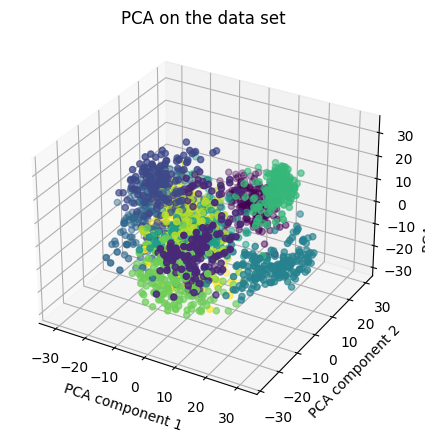

In [97]:
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure
import numpy as np 
fig = plt.figure(figsize =(5, 6))     
ax = fig.add_subplot(projection='3d')
ax.scatter(x.iloc[:,0], x.iloc[:,1], x.iloc[:,2], c=y)
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
ax.set_zlabel("PCA component 3")
ax.set_title("PCA on the data set")
plt.show()

2. Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters.  

In [98]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [99]:
#Model Hyper paramter
np.random.seed(42)
from sklearn.svm import SVC                                     
from sklearn.model_selection import GridSearchCV                
parameters = {'C': [0.1, 1, 10,100] }                                     
gd = GridSearchCV(SVC(kernel='rbf'), parameters ,cv=50, verbose=1)       
gd.fit(x_train, y_train)
print(gd.best_params_)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
{'C': 10}


In [100]:
from sklearn import svm
rbf = svm.SVC(kernel='rbf', C=10, random_state=42)                                            #Classification of model
rbf.fit(x_train, y_train)                                                                   #Fitting the train data
pred = rbf.predict(x_test) 
print('Model score:',r2_score(y_test,pred))
print('Mean Absolute Error:', mean_absolute_error(y_test,pred))
print("Mean Sqaured Error",mean_squared_error(y_test,pred))
print("Root Mean Square Error",np.sqrt(mean_squared_error(y_test,pred)))

Model score: 0.4967730023247813
Mean Absolute Error: 0.8583333333333333
Mean Sqaured Error 4.163888888888889
Root Mean Square Error 2.040560925061756


3. Load "diabetes" datasets from SKlearn and print the dimension of the dataset. Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique. 

In [101]:
from sklearn.datasets import load_diabetes
data = load_diabetes
X = dataset['data']
Y = dataset['target']
print(X.shape, Y.shape)             #printing shapes

(1797, 64) (1797,)


In [102]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, random_state=42)
z = tsne.fit_transform(X)  
print(z.shape) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.679630
[t-SNE] KL divergence after 1000 iterations: 0.627512
(1797, 3)


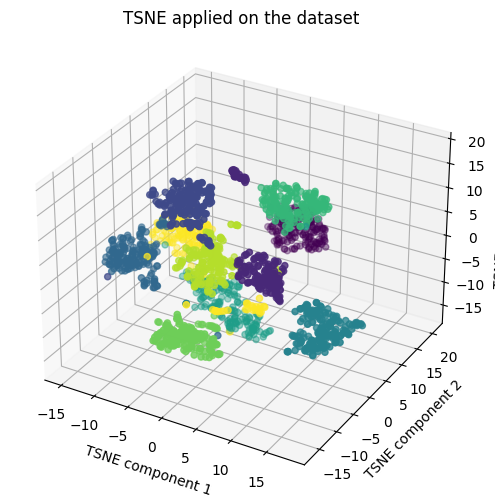

In [103]:
fig = plt.figure(figsize =(6, 6))     
ax = fig.add_subplot(projection='3d')
ax.scatter(z[:,0], z[:,1], z[:,2], c=y)
ax.set_xlabel("TSNE component 1")
ax.set_ylabel("TSNE component 2")
ax.set_zlabel("TSNE component 3")
ax.set_title("TSNE applied on the dataset")
plt.show()

4. Create a model for detecting diabetes using SVM with a poly kernel.  Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters. 

In [104]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [105]:
##Model Hyper paramter
np.random.seed(42)
parameters = {'degree': [3 , 8] , 'gamma': [1 , 0.1, 0.01 , 0.001] }                                     
gd = GridSearchCV(SVC(kernel='poly'), parameters ,cv = 50, verbose=1)       
gd.fit(X_train, Y_train)
print(gd.best_params_)

Fitting 50 folds for each of 8 candidates, totalling 400 fits
{'degree': 3, 'gamma': 1}


In [94]:
from sklearn import svm
poly = svm.SVC(kernel='poly', degree = 3 , gamma = 1)                                                    #Classification of model
poly.fit(X_train, Y_train)                                                                   #Fitting the train data
predict = poly.predict(X_test) 
print('Model score:',r2_score(Y_test,predict))
print('Mean Absolute Error:', mean_absolute_error(Y_test,predict))
print("Mean Sqaured Error",mean_squared_error(Y_test,predict))
print("Root Mean Square Error",np.sqrt(mean_squared_error(Y_test,predict)))

Model score: 0.9822074510495086
Mean Absolute Error: 0.041666666666666664
Mean Sqaured Error 0.14722222222222223
Root Mean Square Error 0.38369548110737794


5. Based on the model hyper-parameters used in task-2 and task-5, share your understanding of hyper-parameters tuning in ML model development.

The model performance is directly proportional to hyper parameters used in the model. The model performace gradually increases if the hyperparameters are selected correctly or it may affect the accuracy of the model. 